In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./who_suicide_statistics.csv")
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [5]:
print("(Rows, columns): "+str(data.shape))
data.columns

(Rows, columns): (43776, 6)


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [6]:
data.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [7]:
data = data.fillna(0)
data.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [8]:
data['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [9]:
data['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [10]:
data['country'].nunique()

141

In [11]:
data['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982], dtype=int64)

In [12]:
#Research Question 1: Which year has the most Suicides ? Which year has the least Suicides ?


data["suicides_no"] = data["suicides_no"].replace(0,np.NAN)

mean_value = data["suicides_no"].mean()
data["suicides_no"] = data["suicides_no"].fillna(mean_value)

def find_minmax(x,coln):
    min_index = data[x].idxmin()
    high_index = data[x].idxmax()

    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    print(f"{coln} which has highest "+ x + " : ",data[coln][high_index])
    print(f"{coln} which has lowest "+ x + " : ",data[coln][min_index])
    return pd.concat([high,low], axis = 1)

find_minmax('suicides_no','year')


year which has highest suicides_no :  1994
year which has lowest suicides_no :  1987


,33128,29
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,75+ years
suicides_no,22338.0,1.0
population,19044200.0,35600.0


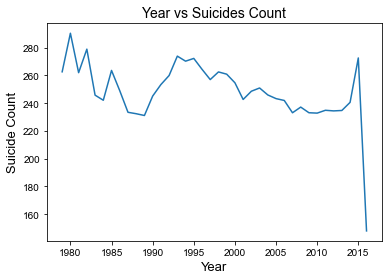

In [13]:
data.groupby('year')['suicides_no'].mean().plot() # year-wise analysis of mean number sucidies of each year
plt.title("Year vs Suicides Count", fontsize = 14)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Suicide Count", fontsize=13)
#setup the figure size. 
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

In [14]:
data['population'] = data['population'].replace(0,data['population'].mean())
data['suicides_per_pop'] = data['suicides_no']/data['population']
data.tail(3)

,country,year,sex,age,suicides_no,population,suicides_per_pop
43773,Zimbabwe,1990,male,5-14 years,6.0,1.456536e+06,0.000004
43774,Zimbabwe,1990,male,55-74 years,74.0,1.456536e+06,0.000051
43775,Zimbabwe,1990,male,75+ years,13.0,1.456536e+06,0.000009


In [15]:
data['suicides_per_pop'] = data.apply(lambda row:row.suicides_no/row.population, axis = 1)
data.tail(3)

,country,year,sex,age,suicides_no,population,suicides_per_pop
43773,Zimbabwe,1990,male,5-14 years,6.0,1.456536e+06,0.000004
43774,Zimbabwe,1990,male,55-74 years,74.0,1.456536e+06,0.000051
43775,Zimbabwe,1990,male,75+ years,13.0,1.456536e+06,0.000009


In [16]:
# Research Question 2: Which country has the most Suicides ? Which country has the least Suicides ?

find_minmax('suicides_per_pop',"country")

country which has highest suicides_per_pop :  Rodrigues
country which has lowest suicides_per_pop :  Egypt


,32351,12993
country,Rodrigues,Egypt
year,2004,2005
sex,male,male
age,75+ years,5-14 years
suicides_no,249.106328,1.0
population,259.0,9543088.0
suicides_per_pop,0.9618,0.0


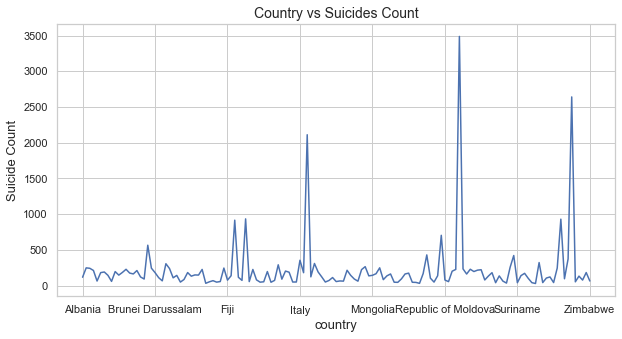

In [17]:
data.groupby('country')['suicides_no'].mean().plot() # year-wise analysis of mean number sucidies of each year
plt.title("Country vs Suicides Count", fontsize = 14)
plt.xlabel("country", fontsize=13)
plt.ylabel("Suicide Count", fontsize=13)
#setup the figure size. 
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

In [18]:
#Research Question 3: Are certain age groups more inclined to suicide?

sample = data.sample(3)
sample

,country,year,sex,age,suicides_no,population,suicides_per_pop
29491,Peru,2010,male,25-34 years,47.000000,1.456536e+06,0.000032
36320,Slovenia,2012,male,35-54 years,134.000000,3.132950e+05,0.000428
6934,British Virgin Islands,2004,male,55-74 years,249.106328,1.456536e+06,0.000171


In [19]:
data.tail(3)

,country,year,sex,age,suicides_no,population,suicides_per_pop
43773,Zimbabwe,1990,male,5-14 years,6.0,1.456536e+06,0.000004
43774,Zimbabwe,1990,male,55-74 years,74.0,1.456536e+06,0.000051
43775,Zimbabwe,1990,male,75+ years,13.0,1.456536e+06,0.000009


In [20]:
#remove "-" from age column

data['AgeNum'] = data['age'].str[:2]
data['AgeNum'] = data['AgeNum'].map(lambda x:x.replace('-',''))
data["AgeNum"] = data['AgeNum'].astype(int)
data['AgeNum'].tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int32

In [21]:
# Create age categories

def AgeGroup(x):
    if (x>=60):
        return "Elderly"
    elif (x>=30):
        return "Middle_Aged_Adults"
    elif (x>=18):
        return "Adults"
    else:
        return "Adolescent"

data['AgeCategory'] = data['AgeNum'].map(lambda x:AgeGroup(x))
data["AgeCategory"] = data["AgeCategory"].astype(str)
data["AgeCategory"].tail(3)

43773            Adolescent
43774    Middle_Aged_Adults
43775               Elderly
Name: AgeCategory, dtype: object

In [22]:
data.tail(3)

,country,year,sex,age,suicides_no,population,suicides_per_pop,AgeNum,AgeCategory
43773,Zimbabwe,1990,male,5-14 years,6.0,1.456536e+06,0.000004,5,Adolescent
43774,Zimbabwe,1990,male,55-74 years,74.0,1.456536e+06,0.000051,55,Middle_Aged_Adults
43775,Zimbabwe,1990,male,75+ years,13.0,1.456536e+06,0.000009,75,Elderly


Text(17.248711111111113, 0.5, 'Suicide Count')

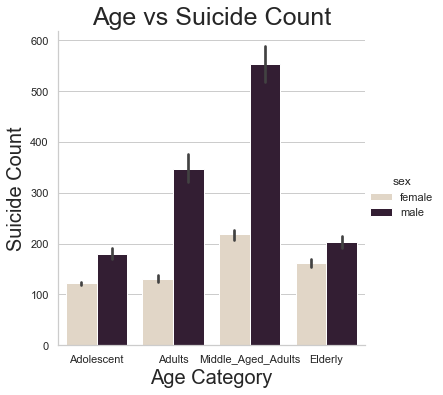

In [23]:
sns.catplot(x="AgeCategory",y="suicides_no",palette="ch:.25",kind="bar",data=data,hue="sex")

plt.title('Age vs Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

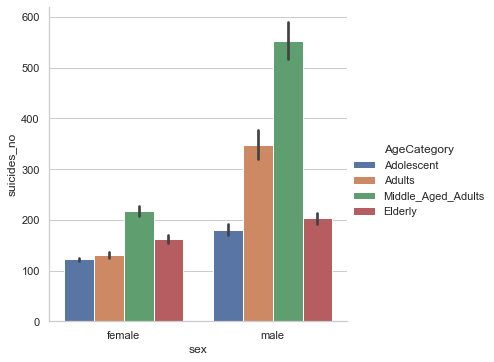

In [24]:
#Research Question 4: What is the relationship between the gender and the number of suicides?

sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=data)

In [28]:
#. Machine Learning + Predictive Analytics

newData= data.loc[:,['year','sex','AgeNum',"suicides_no"]]
newData.head(3)

X = newData.iloc[:,:-1].values
y = newData.iloc[:,-1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.predict([[1,0,2001,55]]))

[187.53125]
